In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

/Users/hasanenesguray/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('top_expensive_leagues.csv')

df.head()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
0,L001,Premier League,England,Football,5.275330e+09,12080000.0,Liverpool,16,1886,485.90
1,L002,Serie A,India,American Football,7.088640e+09,6730000.0,Inter Milan,13,1977,135.01
2,L003,IPL,England,American Football,7.930520e+09,14360000.0,Chennai Super Kings,13,1979,157.49
3,L004,La Liga,Spain,American Football,4.972890e+09,13720000.0,Atletico Madrid,22,1999,245.71
4,L005,Serie A,Italy,Basketball,6.265740e+09,7450000.0,Juventus,16,1963,52.83


In [3]:
df.tail()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
695,L696,Bundesliga,France,Football,2.280400e+09,2970000.0,RB Leipzig,25,1914,159.88
696,L697,Ligue 1,USA,Cricket,6.945200e+08,12130000.0,Lyon,20,2009,194.31
697,L698,Premier League,USA,Football,5.251210e+09,4780000.0,Manchester United,29,2004,79.36
698,L699,NBA,Germany,American Football,5.898850e+09,11020000.0,Miami Heat,22,1897,238.50
699,L700,La Liga,India,Football,2.865280e+09,2110000.0,Barcelona,17,1920,322.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   League ID                    700 non-null    object 
 1   League Name                  700 non-null    object 
 2   Country                      700 non-null    object 
 3   Sport                        700 non-null    object 
 4   Revenue (USD)                700 non-null    float64
 5   Average Player Salary (USD)  700 non-null    float64
 6   Top Team                     700 non-null    object 
 7   Total Teams                  700 non-null    int64  
 8   Founded Year                 700 non-null    int64  
 9   Viewership                   700 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 54.8+ KB


In [5]:
df.sample()

,League ID,League Name,Country,Sport,Revenue (USD),Average Player Salary (USD),Top Team,Total Teams,Founded Year,Viewership
15,L016,Ligue 1,Germany,Cricket,5.064830e+09,14910000.0,Lyon,31,1893,259.39


<Axes: >

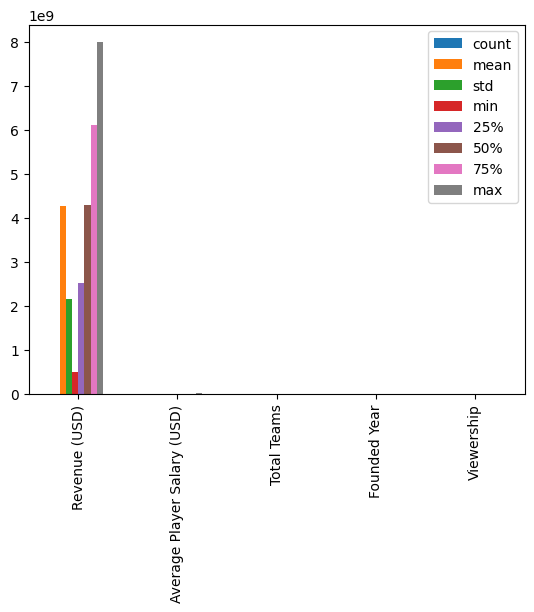

In [6]:
df.describe().T.plot(kind='bar')

In [7]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
League ID,700,700,L001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
League Name,700,8,Premier League,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,700,7,India,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sport,700,4,Football,188,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Revenue (USD),700.0,NaN,NaN,NaN,4280496485.714286,2162866730.423744,505400000.0,2522775000.0,4306905000.0,6112677500.0,7997000000.0
Average Player Salary (USD),700.0,NaN,NaN,NaN,7900442.857143,4100048.07584,1010000.0,4180000.0,7835000.0,11485000.0,14960000.0
Top Team,700,24,Inter Milan,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Teams,700.0,NaN,NaN,NaN,21.184286,6.676591,10.0,15.0,21.0,27.0,32.0
Founded Year,700.0,NaN,NaN,NaN,1953.061429,40.956733,1880.0,1917.75,1953.5,1989.25,2023.0
Viewership,700.0,NaN,NaN,NaN,255.9444,140.300158,2.28,135.0775,250.86,376.5125,499.95


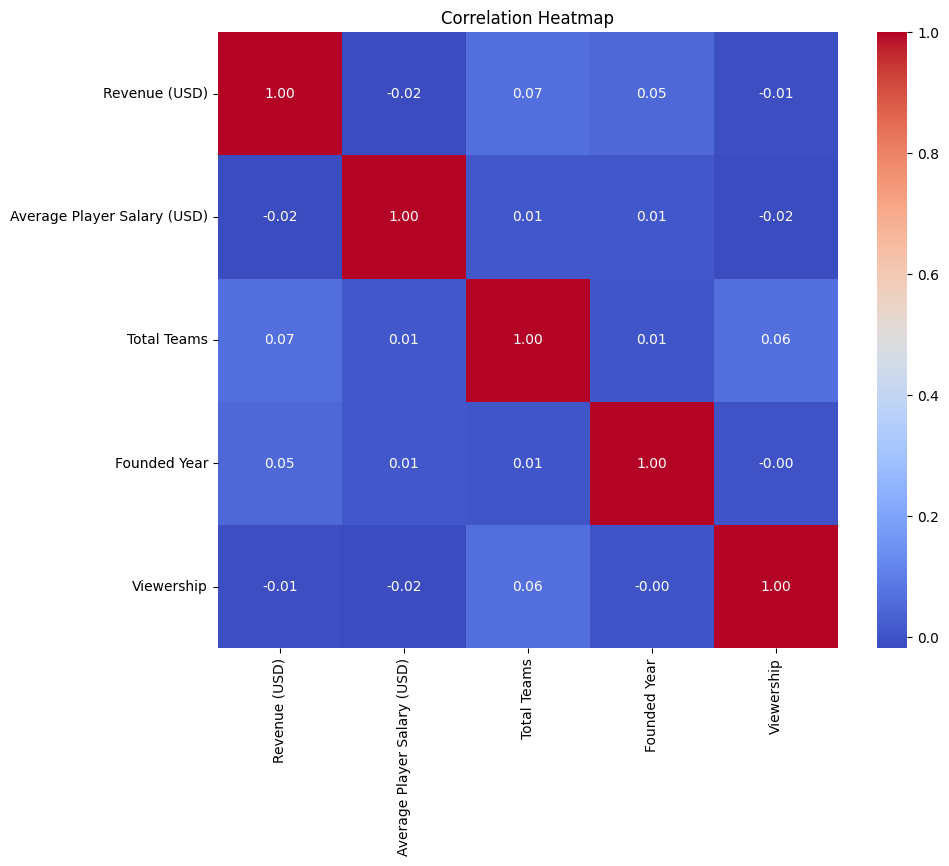

In [8]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
df.isnull().sum()

League ID                      0
League Name                    0
Country                        0
Sport                          0
Revenue (USD)                  0
Average Player Salary (USD)    0
Top Team                       0
Total Teams                    0
Founded Year                   0
Viewership                     0
dtype: int64

In [10]:
df.duplicated().sum()

0